# Anyonic models

We solve the almost-bosonic anyon model of https://arxiv.org/pdf/1901.10739.pdf

Iter     Function value   Gradient norm 
     0     8.414903e+01     1.399054e+01
 * time: 0.0022859573364257812
     1     6.428965e+01     9.335103e+00
 * time: 0.006232023239135742
     2     5.657138e+01     1.288809e+01
 * time: 0.015226125717163086
     3     4.305736e+01     9.541288e+00
 * time: 0.027585983276367188
     4     3.390354e+01     8.205341e+00
 * time: 0.04002809524536133
     5     1.467657e+01     2.806577e+00
 * time: 0.09438109397888184
     6     1.048841e+01     2.815494e+00
 * time: 0.10351204872131348
     7     9.011969e+00     2.799866e+00
 * time: 0.11256814002990723
     8     8.971772e+00     6.928903e+00
 * time: 0.11986613273620605
     9     8.003941e+00     3.344784e+00
 * time: 0.12889313697814941
    10     7.966880e+00     5.195204e+00
 * time: 0.13630294799804688
    11     7.890976e+00     4.010150e+00
 * time: 0.14354300498962402
    12     7.047052e+00     2.300241e+00
 * time: 0.1507420539855957
    13     6.477948e+00     3.340172e+00
 * t

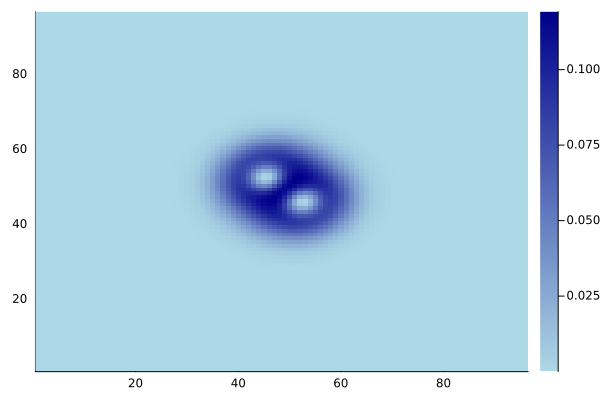

In [1]:
using DFTK
using StaticArrays
using Plots

# Unit cell. Having one of the lattice vectors as zero means a 2D system
a = 14
lattice = a .* [[1 0 0.]; [0 1 0]; [0 0 0]];

# Confining scalar potential
pot(x, y, z) = ((x - a/2)^2 + (y - a/2)^2);

# Parameters
Ecut = 50
n_electrons = 1
β = 5;

# Collect all the terms, build and run the model
terms = [Kinetic(; scaling_factor=2),
         ExternalFromReal(X -> pot(X...)),
         Anyonic(1, β)
]
model = Model(lattice; n_electrons, terms, spin_polarization=:spinless)  # "spinless electrons"
basis = PlaneWaveBasis(model; Ecut, kgrid=(1, 1, 1))
scfres = direct_minimization(basis, tol=1e-14)  # Reduce tol for production
E = scfres.energies.total
s = 2
E11 = π/2 * (2(s+1)/s)^((s+2)/s) * (s/(s+2))^(2(s+1)/s) * E^((s+2)/s) / β
println("e(1,1) / (2π)= ", E11 / (2π))
heatmap(scfres.ρ[:, :, 1, 1], c=:blues)